# Keras demo with MNIST database of handwritten digits

In [1]:
from keras.datasets import mnist
from keras import models
from keras.models import Sequential
from keras import layers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from keras.layers.core import Dense, Flatten, Dropout, Activation
import keras

from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


## Load and preprocess dataset

y_train : 7
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


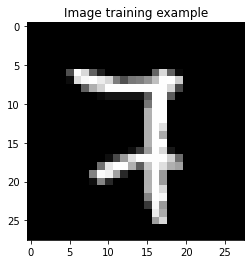

In [2]:
num_classes = 10
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('y_train : '+str(y_train[16700]))

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


imgshow = x_train[16700].reshape(28,28)
plt.figure()
plt.title('Image training example')
plt.imshow(imgshow,cmap='gray', vmin=0, vmax=1)

## CNN Model

In [3]:
def CNN():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128, activation='relu')) # dipakai setelah flatten()
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  
  return model

In [4]:
model = CNN()
print(model.summary())
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

## Train

In [5]:
model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=128,
          verbose=1,
          validation_data=(x_test, y_test)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2587 - accuracy: 0.9204 - val_loss: 0.0595 - val_accuracy: 0.9800
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0953 - accuracy: 0.9709 - val_loss: 0.0379 - val_accuracy: 0.9876
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0709 - accuracy: 0.9782 - val_loss: 0.0382 - val_accuracy: 0.9875
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0604 - accuracy: 0.9807 - val_loss: 0.0319 - val_accuracy: 0.9896
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0281 - val_accuracy: 0.9912
Epoch 6/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0269 - val_accuracy: 0.9915
Epoch 7/10
60000/60000 [==============================] - 6s 1

## Test

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Score : {score}")
# print(f"Test loss : {score[0]}")
# print(f"Test acc. : {score[1]}")

Score : [0.02514346999444424, 0.9925000071525574]


## Predict

Pred : [[2.6103824e-09 3.9648981e-10 1.1103505e-14 1.4592389e-14 6.2690531e-10
  4.5966173e-10 1.0000000e+00 1.2341247e-14 2.8226724e-10 5.8013104e-14]]
Pred : 6


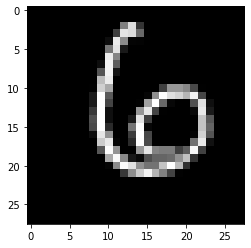

In [7]:
index_test = 100
pred = model.predict(np.array([x_test[index_test]]))
print(f"Pred : {pred}")
print(f"Pred : {np.argmax(pred)}")
plt.imshow(np.reshape(x_test[index_test], (28, 28)), cmap='gray')